In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# nltk is one of the most useful libraries when it comes to nlp
!pip install nltk
!pip install wordcloud
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Preprocessing and evaluation
from nltk.corpus import stopwords
from tqdm import tqdm



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_excel("hotel_reviews.xlsx")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.values

array([['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
        4],
       ['ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sittin

In [ ]:
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [ ]:
df.shape

(20491, 2)

# Cleaning the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

As you can see from above details, there is no null values in this dataset

In [ ]:
# look  describe data set
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

In [ ]:
#The average a round 4 , it is good

In [ ]:
# any duplicate data 
df.duplicated().sum()

0

# DATA VISUALIZATION

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

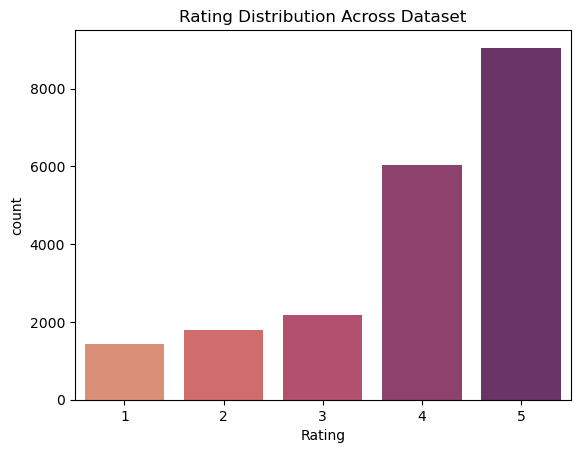

In [ ]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

The percentage rating

5 = 44%

4 = 30%

3 = 10%

2 = 9%

1 = 7%


* Rating 5 = 44% -> satisfy

We see the people satisfy = rating 5 in this words

In general the hotel - room - night - beach - restaurant and food and drink - bed - pool - locations.

* Rating 4 = 30% -> satisfy

We see the people satisfy = rating 4 in this words the same rating 5 but plus ...

beautiful hotel - staff friendly - service - street.

* Rating 2 = 9% -> unsatisfied

We see the people unsatisfied = rating 2 in this words the same rating 5 & 4 but plus ...

Hotel - staff - beach - srevice - disk - stay - shower

* Rating 1 = 7% -> unsatisfied

We see the people unsatisfied = rating 1 in this words the same rating 5 & 4 but plus ...

room - hotel - place - staff - door - check in - sleep - toilet - resort -water.

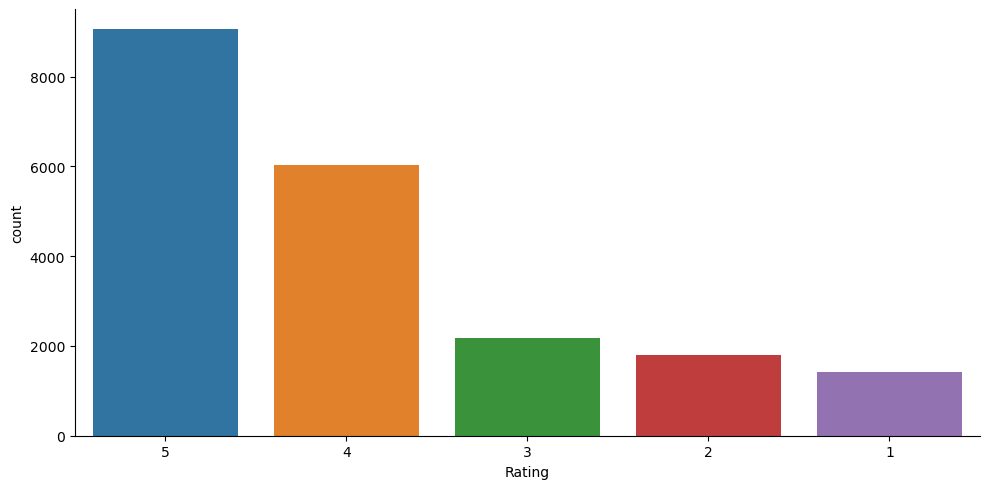

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='Rating', kind="count", aspect = 2, data=df, order = df['Rating'].value_counts().index)

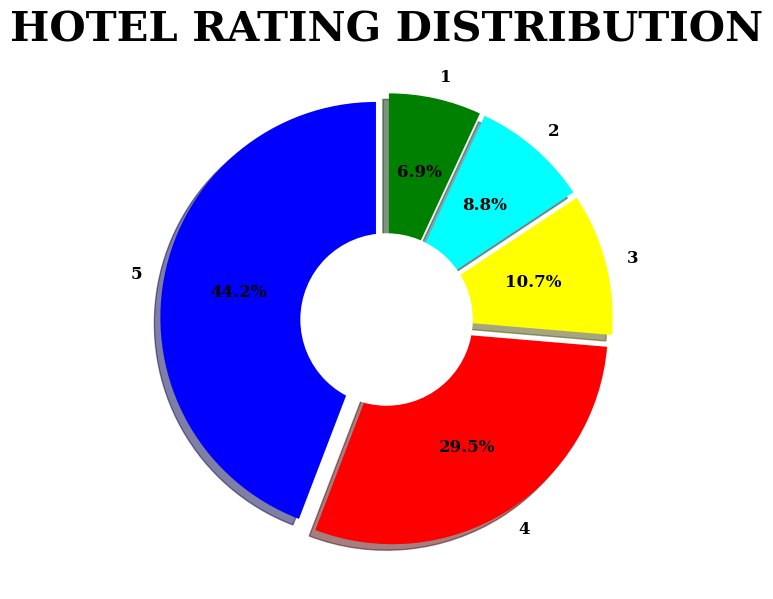

In [ ]:
label_data= df['Rating'].value_counts()
labels_name = ['5','4','3','2','1']
explode=(0.05,0.05,0.05,0.05,0.05)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data, labels= labels_name, colors=['blue','red','yellow','cyan','Green'], pctdistance=0.65,shadow=True,
                             startangle=90, explode=explode, autopct='%1.1f%%',
                             textprops={'fontsize':12,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='black')
hfont={'weight':'bold','family':'serif'}
plt.title('HOTEL RATING DISTRIBUTION',size=30,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

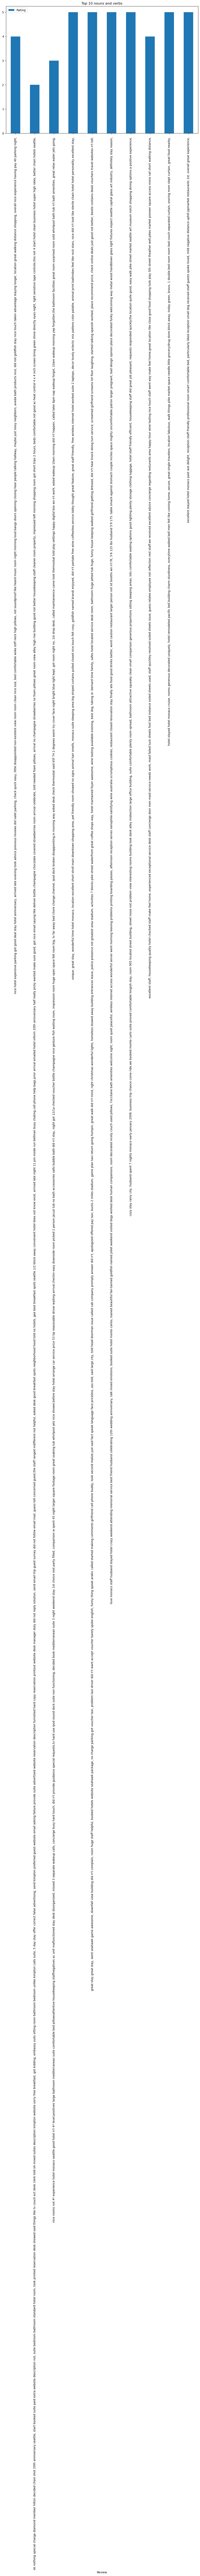

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
df[0:10].plot.bar(x='Review',figsize=(12,8),title='Top 10 nouns and verbs');

<Axes: >

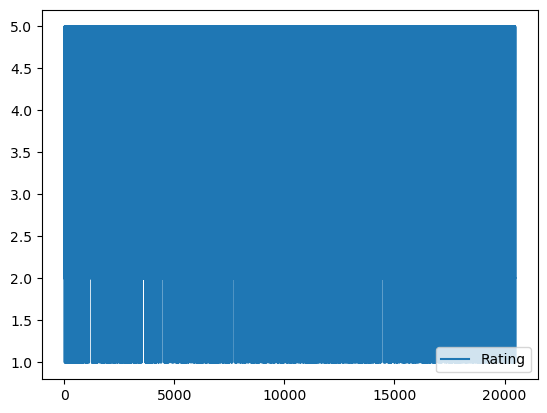

In [ ]:
df.plot()

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

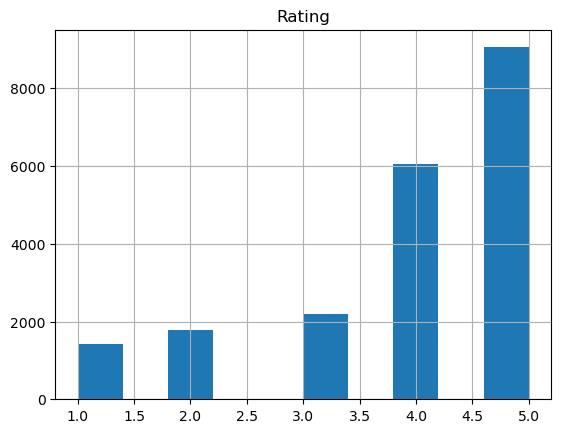

In [ ]:
df.hist()

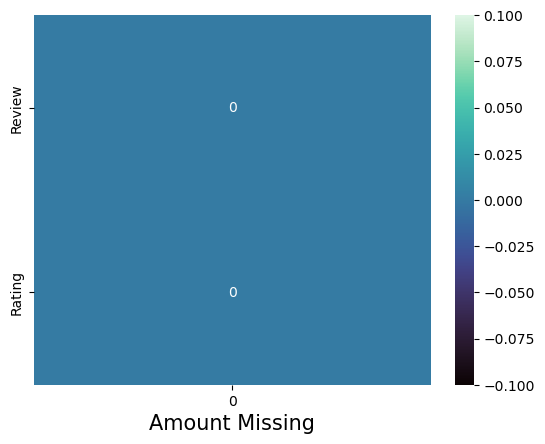

In [ ]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('Amount Missing',fontsize=15)
plt.show()

<Axes: >

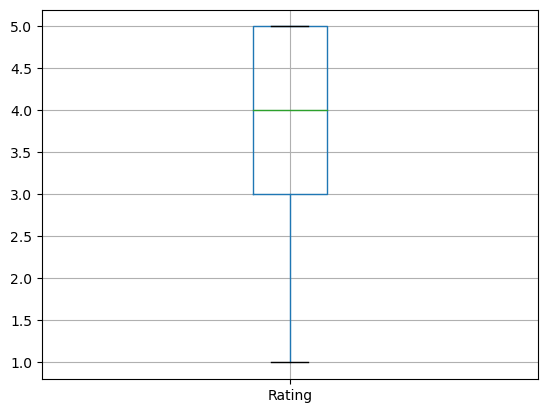

In [ ]:
df.boxplot()

# Text Mining

In [ ]:
#Calculating the count of words and length of Review in each review 
df["word_count"]= df.Review.apply(lambda x: len(str(x).split(' ')))
df["Review_length"] = df.Review.apply(len)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.233030,1.0,3.0,4.0,5.0,5.0
word_count,20491.0,106.375043,100.655267,9.0,50.0,79.0,126.0,1933.0
Review_length,20491.0,725.245571,689.933070,44.0,339.0,537.0,859.0,13501.0


In [ ]:
#Reviewing the outliers:
df1= df.sort_values(by = 'Review_length',ascending=False)
df1.head(20)

,Review,Rating,word_count,Review_length
7072,honest review visit 5/21-5/28 let begin saying...,3,1933,13501
7049,"false start good vacation secrets__Ç, false st...",5,1757,12762
13003,awesome vacation sirenis punta cana arrival fl...,5,1641,11014
17777,"fantastic return trip, firstly apology length ...",5,1610,10420
17800,wanted know afraid ask just 10 short days ago ...,4,1459,10062
6823,"sunscape spectacular, august 2002 heard read r...",5,1385,9748
17953,"great value great resort, family party hubbie ...",4,1437,9712
18911,vacation make husband stayed ocean blue septem...,3,1329,9405
6821,relaxing great time husband stayed sunscape ap...,4,1460,9351
2962,"bavaro princess- incredible environment, overa...",4,1347,8953


In [ ]:
#shape of Dataset:
print(f'there are {df1.shape[0]} reviews and {df1.shape[1]} features in the dataset')

there are 20491 reviews and 4 features in the dataset


# Number of Words

In [ ]:
#Number of Words in single tweet
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head(10)

,Review,word_count
0,nice hotel expensive parking got good deal sta...,89
1,ok nothing special charge diamond member hilto...,252
2,nice rooms not 4* experience hotel monaco seat...,219
3,"unique, great stay, wonderful time hotel monac...",91
4,"great stay great stay, went seahawk game aweso...",193
5,love monaco staff husband stayed hotel crazy w...,136
6,"cozy stay rainy city, husband spent 7 nights m...",103
7,"excellent staff, housekeeping quality hotel ch...",87
8,"hotel stayed hotel monaco cruise, rooms genero...",61
9,excellent stayed hotel monaco past w/e delight...,37


# Number of Characters

In [ ]:
#Number of characters in single tweet
df['char_count'] = df['Review'].str.len() ## this also includes spaces
df[['Review','char_count']].head(10)

,Review,char_count
0,nice hotel expensive parking got good deal sta...,593
1,ok nothing special charge diamond member hilto...,1689
2,nice rooms not 4* experience hotel monaco seat...,1427
3,"unique, great stay, wonderful time hotel monac...",600
4,"great stay great stay, went seahawk game aweso...",1281
5,love monaco staff husband stayed hotel crazy w...,1002
6,"cozy stay rainy city, husband spent 7 nights m...",748
7,"excellent staff, housekeeping quality hotel ch...",597
8,"hotel stayed hotel monaco cruise, rooms genero...",419
9,excellent stayed hotel monaco past w/e delight...,271


# Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Review'].apply(lambda x: avg_word(x))
df[['Review','avg_word']].head(5)

,Review,avg_word
0,nice hotel expensive parking got good deal sta...,5.804598
1,ok nothing special charge diamond member hilto...,5.752000
2,nice rooms not 4* experience hotel monaco seat...,5.571429
3,"unique, great stay, wonderful time hotel monac...",5.730337
4,"great stay great stay, went seahawk game aweso...",5.701571


# # Number of stopwords

In [ ]:
stop = stopwords.words('english')

df['stopwords'] = df['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Review','stopwords']].head(5)

,Review,stopwords
0,nice hotel expensive parking got good deal sta...,6
1,ok nothing special charge diamond member hilto...,12
2,nice rooms not 4* experience hotel monaco seat...,5
3,"unique, great stay, wonderful time hotel monac...",3
4,"great stay great stay, went seahawk game aweso...",11


# Number of Special Characters

In [ ]:
df['hastags'] = df['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Review','hastags']].head()

,Review,hastags
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


# Number of Numerics

In [ ]:
df['numerics'] = df['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Review','numerics']].head()

,Review,numerics
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,7
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",2


# Number of Upper Case Words

In [ ]:
df['upper'] = df['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Review','upper']].head()

,Review,upper
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


# Number of Upper Case Words

In [ ]:
df['upper'] = df['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Review','upper']].head()

,Review,upper
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


# Pre - Processing

# Lower Case

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

# Common word removal

In [ ]:
freq = pd.Series(' '.join(df['Review']).split()).value_counts()[:10]
freq

hotel    42079
not      30750
room     30532
great    18732
n't      18436
staff    14950
good     14791
did      13433
just     12458
stay     11376
dtype: int64

In [ ]:
freq = list(freq.index)
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Review'].head()

0    nice expensive parking got deal anniversary, a...
1    ok nothing special charge diamond member hilto...
2    nice rooms 4* experience monaco seattle 4* lev...
3    unique, stay, wonderful time monaco, location ...
4    stay, went seahawk game awesome, downfall view...
Name: Review, dtype: object

# Rare Words Removal

In [ ]:
freq = pd.Series(' '.join(df['Review']).split()).value_counts()[-10:]
freq

have.every       1
one.1            1
went.-           1
choice.-         1
founded,         1
vacationers.-    1
respectful.-     1
repel            1
lemons.-         1
prostitution,    1
dtype: int64

In [ ]:
freq = list(freq.index)
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Review'].head()

0    nice expensive parking got deal anniversary, a...
1    ok nothing special charge diamond member hilto...
2    nice rooms 4* experience monaco seattle 4* lev...
3    unique, stay, wonderful time monaco, location ...
4    stay, went seahawk game awesome, downfall view...
Name: Review, dtype: object

# Spelling correction

In [ ]:
pip install -U textblob


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob

In [ ]:
df['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    nice expensive parking got deal anniversary, a...
1    ok nothing special charge diamond member hilto...
2    nice rooms 4* experience monarch seattle 4* le...
3    unique, stay, wonderful time monarch, location...
4    stay, went seahawk game awesome, downfall view...
Name: Review, dtype: object

# Wordlist

In [ ]:
TextBlob(df['Review'][1]).words

WordList(['ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'description', 'not', 'suite', 'bedroom', 'bathroom', 'standard', 'room', 'took', 'printed', 'reservation', 'desk', 'showed', 'said', 'things', 'like', 'tv', 'couch', 'ect', 'desk', 'clerk', 'told', 'oh', 'mixed', 'suites', 'description', 'kimpton', 'website', 'sorry', 'free', 'breakfast', 'got', 'kidding', 'embassy', 'suits', 'sitting', 'bathroom', 'bedroom', 'unlike', 'kimpton', 'calls', 'suite', '5', 'day', 'offer', 'correct', 'false', 'advertising', 'send', 'kimpton', 'preferred', 'guest', 'website', 'email', 'asking', 'failure', 'provide', 'suite', 'advertised', 'website', 'reservation', 'description', 'furnished', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk', 'manager', 'duty', 'reply', 'solution', 'send', 'email', 'trip', 'guest', 'survey', 'follow', 'email', 'mail', 'g

In [ ]:
TextBlob(df['Review'][2]).words

WordList(['nice', 'rooms', '4', 'experience', 'monaco', 'seattle', '4', 'level.positives', 'large', 'bathroom', 'mediterranean', 'suite', 'comfortable', 'bed', 'pillowsattentive', 'housekeeping', 'staffnegatives', 'ac', 'unit', 'malfunctioned', 'desk', 'disorganized', 'missed', '3', 'separate', 'wakeup', 'calls', 'concierge', 'busy', 'hard', 'touch', 'provide', 'guidance', 'special', 'requests.tv', 'hard', 'use', 'ipod', 'sound', 'dock', 'suite', 'non', 'functioning', 'decided', 'book', 'mediterranean', 'suite', '3', 'night', 'weekend', '1st', 'choice', 'rest', 'party', 'filled', 'comparison', 'w', 'spent', '45', 'night', 'larger', 'square', 'footage', 'soaking', 'tub', 'whirlpool', 'jets', 'nice', 'shower.before', 'arrange', 'car', 'service', 'price', '53', 'tip', 'reasonable', 'driver', 'waiting', 'arrival.checkin', 'easy', 'downside', 'picked', '2', 'person', 'jacuzi', 'tub', 'no', 'bath', 'accessories', 'salts', 'bubble', 'bath', 'stay', 'night', 'got', '12/1a', 'checked', 'voucher

In [ ]:
TextBlob(df['Review'][3]).words

WordList(['unique', 'stay', 'wonderful', 'time', 'monaco', 'location', 'excellent', 'short', 'stroll', 'main', 'downtown', 'shopping', 'area', 'pet', 'friendly', 'showed', 'no', 'signs', 'animal', 'hair', 'smells', 'monaco', 'suite', 'sleeping', 'area', 'big', 'striped', 'curtains', 'pulled', 'closed', 'nice', 'touch', 'felt', 'cosy', 'goldfish', 'named', 'brandi', 'enjoyed', 'partake', 'free', 'wine', 'coffee/tea', 'service', 'lobby', 'thought', 'feature', 'friendly', 'free', 'wireless', 'internet', 'worked', 'suite', '2', 'laptops', 'decor', 'lovely', 'eclectic', 'mix', 'pattens', 'color', 'palatte', 'animal', 'print', 'bathrobes', 'feel', 'like', 'rock', 'stars', 'nice', 'look', 'like', 'sterile', 'chain', 'personality', 'excellent', 'stay'])

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nice expens park got deal anniversary, arriv l...
1    ok noth special charg diamond member hilton de...
2    nice room 4* experi monaco seattl 4* level.pos...
3    unique, stay, wonder time monaco, locat excel ...
4    stay, went seahawk game awesome, downfal view ...
Name: Review, dtype: object

# Using VADER

In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Assuming df is your DataFrame

# Define a function to perform sentiment analysis using VADER
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    
    if sentiment_scores['compound'] > 0:
        return 'positive'
    elif sentiment_scores['compound'] == 0:
        return 'neutral'
    else:
        return 'negative'

# Group the DataFrame by 'Rating_name'
grouped_df = df.groupby('Rating')

for Rating_name, group in grouped_df:
    Rating_sentiments = group['Review'].apply(get_sentiment)
    sentiment_counts = Rating_sentiments.value_counts()

    # Do something with sentiment_counts, for example, print the results
    print(f"Sentiment analysis for {Rating_name}:")
    print(sentiment_counts)
    print("\n")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis for 1:
negative    813
positive    603
neutral       5
Name: Review, dtype: int64


Sentiment analysis for 2:
positive    1337
negative     451
neutral        5
Name: Review, dtype: int64


Sentiment analysis for 3:
positive    2001
negative     176
neutral        7
Name: Review, dtype: int64


Sentiment analysis for 4:
positive    5922
negative     112
neutral        5
Name: Review, dtype: int64


Sentiment analysis for 5:
positive    8982
negative      63
neutral        9
Name: Review, dtype: int64




In [ ]:
reviews_df = df.sample(frac=0.1, replace=False, random_state=42)

In [ ]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Assuming your DataFrame is named reviews_df
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

In [ ]:
reviews_df.head()

,Review,Rating,word_count,Review_length,char_count,avg_word,stopwords,hastags,numerics,upper,neg,neu,pos,compound,nb_chars,nb_words
10726,"recommend reviewers actually did, thing locati...",1,48,312,312,5.760870,6,0,1,0,0.251,0.578,0.170,-0.5627,252,34
14919,"barcelona rocks, stayed jazz girlfriend 3 nigh...",4,360,2479,2479,5.921788,7,0,13,0,0.143,0.667,0.190,0.9485,2330,329
19098,ok location stayed night way beijing rawa isla...,3,27,164,164,5.520000,0,0,1,0,0.000,0.690,0.310,0.7351,134,20
2450,service nice pool ok beach lovely grounds smal...,4,320,2059,2059,5.471698,13,0,6,0,0.092,0.664,0.244,0.9945,1938,293
960,surprising treat spent weekend july 15/16 2006...,5,98,689,689,6.166667,1,0,1,0,0.061,0.627,0.312,0.9801,664,92


In [ ]:
print(reviews_df.shape)

(2049, 16)


# Creating WordCloud for Positive and Negative reviews

In [ ]:
df['Sentiment']=np.where(df['Rating']>3,'Positive','Negative')

In [ ]:
df.head(3)

,Review,Rating,word_count,Review_length,char_count,avg_word,stopwords,hastags,numerics,upper,Sentiment
0,"nice expensive parking got deal anniversary, a...",4,89,593,593,5.804598,6,0,1,0,Positive
1,ok nothing special charge diamond member hilto...,2,252,1689,1689,5.752000,12,0,6,0,Negative
2,nice rooms 4* experience monaco seattle 4* lev...,3,219,1427,1427,5.571429,5,0,7,0,Negative


In [ ]:
Positive_sentiment = df['Sentiment'] == 'Positive'
Positive_df = df[Positive_sentiment]

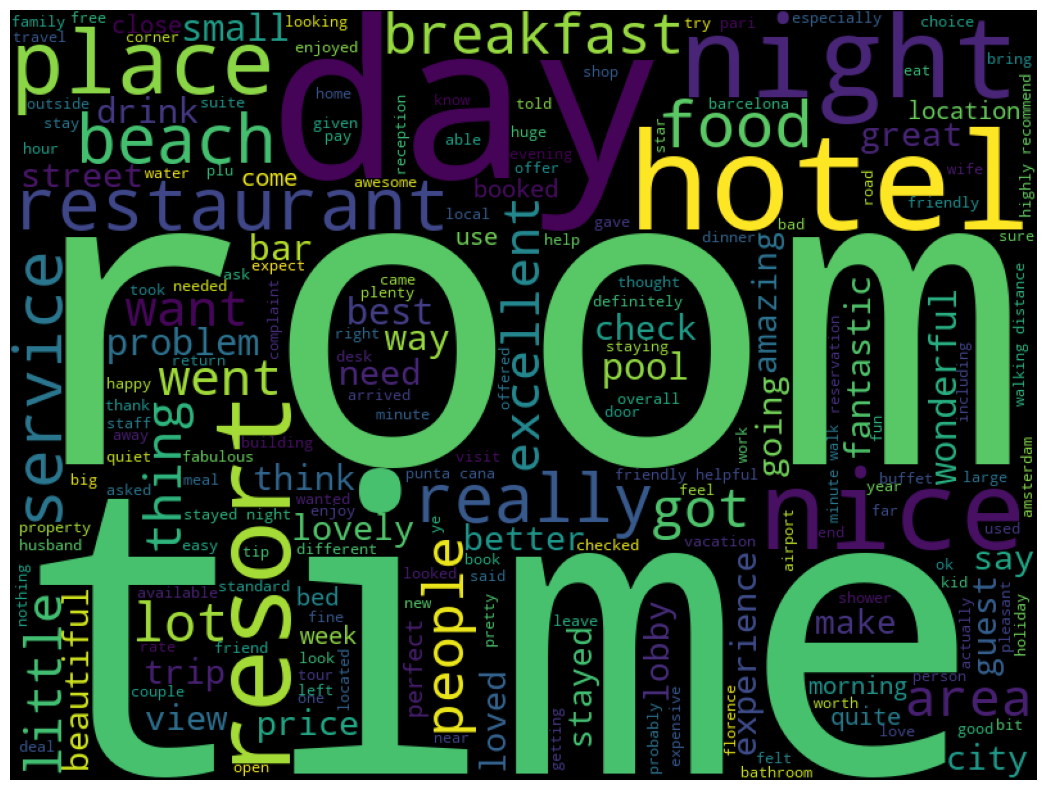

In [ ]:
# Creating a word cloud visualization of the Positive sentiment category
cloud = WordCloud(width=800, height=600).generate(" ".join(df[Positive_sentiment]['Review']))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
#Creating Negative sentiment category
Negative_sentiment = df['Sentiment'] == 'Negative'
Negative_df = df[Negative_sentiment]


(-0.5, 799.5, 599.5, -0.5)

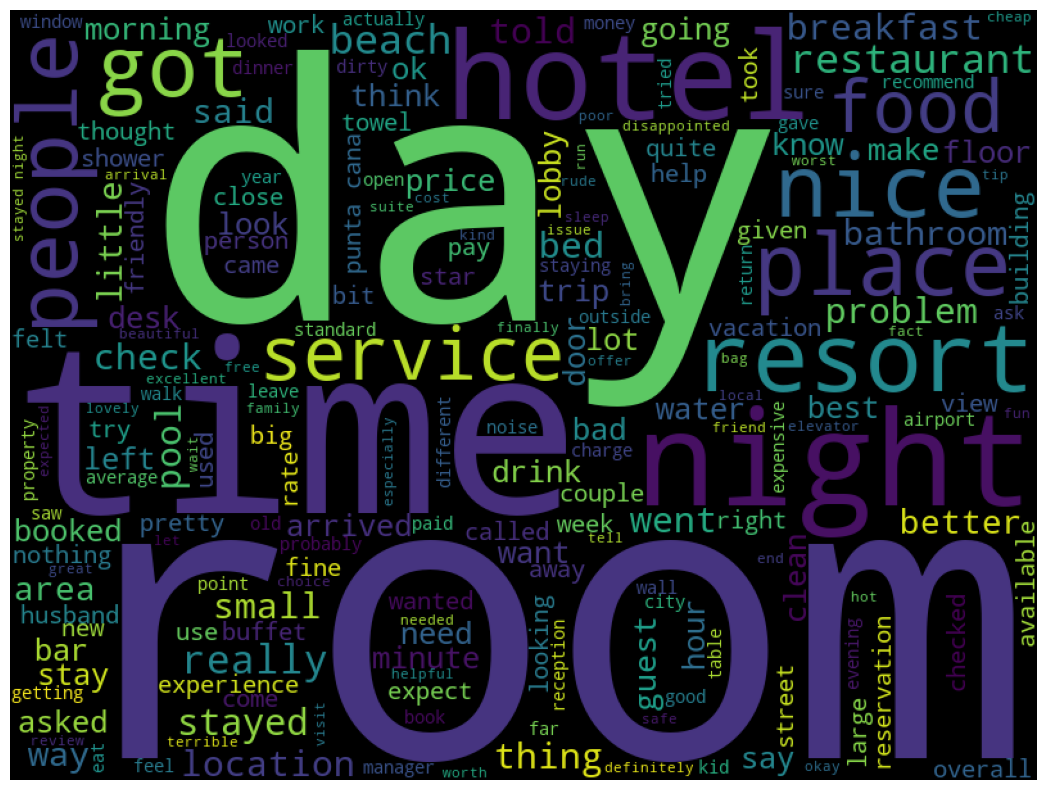

In [ ]:
#Creating a word cloud visualization of the Negative sentiment category
cloud=WordCloud(width=800, height=600).generate(" ".join(df[Negative_sentiment]['Review'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

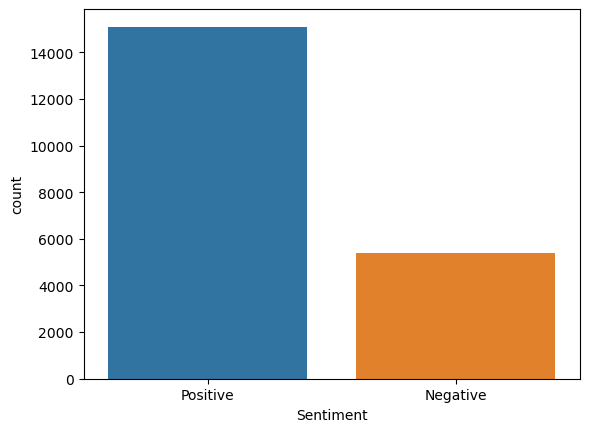

In [ ]:

sns.countplot(x=df['Sentiment'])
plt.show()

# standardize_text

In [ ]:
# function for cleaning Review
def standardize_text(df, field):
    df[field] = df[field].str.replace(r"http\S+", "")
    df[field] = df[field].str.replace(r"http","")
    df[field] = df[field].str.replace(r"@/S+","")
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.lower()
    return df

In [ ]:
standardize_text(df,"Review")

,Review,Rating,word_count,Review_length,char_count,avg_word,stopwords,hastags,numerics,upper,Sentiment
0,"nice expensive parking got deal anniversary, a...",4,89,593,593,5.804598,6,0,1,0,Positive
1,ok nothing special charge diamond member hilto...,2,252,1689,1689,5.752000,12,0,6,0,Negative
2,nice rooms 4 experience monaco seattle 4 lev...,3,219,1427,1427,5.571429,5,0,7,0,Negative
3,"unique, stay, wonderful time monaco, location ...",5,91,600,600,5.730337,3,0,1,0,Positive
4,"stay, went seahawk game awesome, downfall view...",5,193,1281,1281,5.701571,11,0,2,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, 5 sta...",5,111,733,733,5.715596,2,0,1,0,Positive
20487,location price view quick place sights directl...,4,41,306,306,6.820513,0,0,0,0,Positive
20488,"ok looks nice modern outside, desk particularl...",2,65,443,443,6.015873,2,0,0,0,Negative
20489,theft ruined vacation opened sept 17 2007 gues...,1,783,5557,5557,6.113956,27,0,12,0,Negative


# clean_text

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    stop = set(stopwords.words('english'))
    punc = set(punctuation)
    bad_tokens = stop.union(punc)
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t.lower() not in bad_tokens]
    return " ".join(clean_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Applying text preprocessing methods to df['Review']
df['Review'] = df['Review'].apply(clean_text)

In [ ]:
df.head(5)

,Review,Rating,word_count,Review_length,char_count,avg_word,stopwords,hastags,numerics,upper,Sentiment
0,nice expensive parking got deal anniversary ar...,4,89,593,593,5.804598,6,0,1,0,Positive
1,ok nothing special charge diamond member hilto...,2,252,1689,1689,5.752000,12,0,6,0,Negative
2,nice room experience monaco seattle level posi...,3,219,1427,1427,5.571429,5,0,7,0,Negative
3,unique stay wonderful time monaco location exc...,5,91,600,600,5.730337,3,0,1,0,Positive
4,stay went seahawk game awesome downfall view b...,5,193,1281,1281,5.701571,11,0,2,0,Positive


# 1. Creating WordClouds

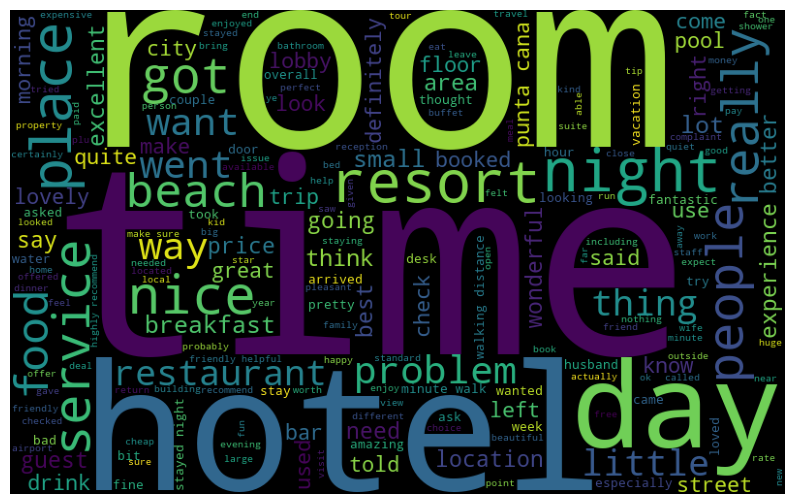

In [ ]:
from wordcloud import WordCloud 
wc = WordCloud(width=800,
               height=500,
               background_color='black',
               min_font_size=10)
wc.generate(''.join(df['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Split into test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Review, df.Sentiment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

# Use a Classification model

# Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
from  pickle import dump
from pickle import load
import pickle

clf_svm = svm.SVC(kernel='linear') 
clf_svm.fit(x_train_vec, y_train)



SVC(kernel='linear')

In [ ]:
with open('svm_model.pkl', 'wb') as model_file:
    dump(clf_svm, model_file)

# Load the model from the file
with open('svm_model.pkl', 'rb') as model_file:
    loaded_svm_model = load(model_file)

# Teat accuracy

In [ ]:
clf_svm.score(x_test_vec, y_test)

0.8608237360921335

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(x_test_vec), average= None)

In [ ]:
rev=['This place was beautiful, cant wait to come back']
rev_vec =v.transform(rev)
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

In [ ]:
rev=['ok just looks nice modern outside']
rev_vec =v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

# RandomForestClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Text preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Model building
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x_train_tfidf, y_train)

# Prediction
y_pred = random_forest_classifier.predict(x_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8252976771422994


In [ ]:
from sklearn.metrics import f1_score
y_pred = random_forest_classifier.predict(x_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  
# Classification Report
report = classification_report(y_test, y_pred)


print(f"F1 Score: {f1}")
print("Classification Report:\n", report)

F1 Score: 0.7954720190796549
Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.36      0.52      1350
    Positive       0.81      0.99      0.89      3773

    accuracy                           0.83      5123
   macro avg       0.87      0.68      0.71      5123
weighted avg       0.84      0.83      0.80      5123



In [ ]:
# New review
new_review = ['ok nothing special charge diamond member']

# Transform the new review using the same TfidfVectorizer
new_review_tfidf = tfidf_vectorizer.transform(new_review)

# Prediction
y_pred = random_forest_classifier.predict(new_review_tfidf)

# Print the predicted sentiment
print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: Negative


# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Model building - Multinomial Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train_tfidf, y_train)

# Prediction
y_pred_nb = naive_bayes_classifier.predict(x_test_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
report_nb = classification_report(y_test, y_pred_nb)

# Print results for Multinomial Naive Bayes
print("Multinomial Naive Bayes:")
print(f"Accuracy: {accuracy_nb}")
print(f"F1 Score: {f1_nb}")
print("Classification Report:\n", report_nb)

Multinomial Naive Bayes:
Accuracy: 0.758735116142885
F1 Score: 0.674426769616019
Classification Report:
               precision    recall  f1-score   support

    Negative       0.98      0.09      0.16      1350
    Positive       0.75      1.00      0.86      3773

    accuracy                           0.76      5123
   macro avg       0.87      0.54      0.51      5123
weighted avg       0.81      0.76      0.67      5123



# plotting the accuracy and f1 score

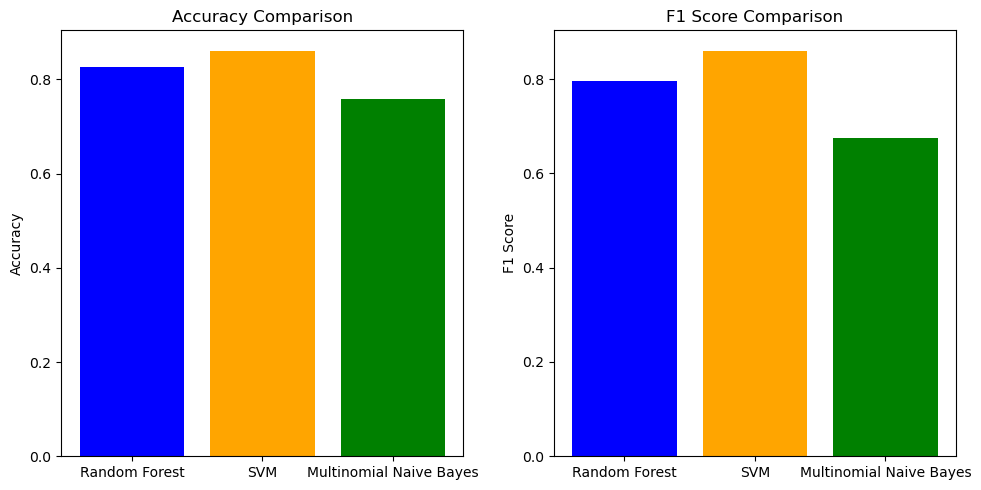

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Random Forest', 'SVM', 'Multinomial Naive Bayes']
accuracy_values = [accuracy, clf_svm.score(x_test_vec, y_test), accuracy_nb]
f1_values = [f1, f1_score(y_test, clf_svm.predict(x_test_vec), average='weighted'), f1_nb]

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracy_values, color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Plotting F1 Score
plt.subplot(1, 2, 2)
plt.bar(models, f1_values, color=['blue', 'orange', 'green'])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

By seeing the plot we can say the Support Vector Machines (SVM) is giving good accuracy 